In [3]:
# imports
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
# allow plots to appear directly in the notebook
%matplotlib inline

### Question2

In [4]:
# read data into a DataFrame
data = pd.read_stata('progresa.dta')
pd.set_option('display.max_columns', None)

In [5]:
data['poor']=data['poor'].apply(lambda x:1 if x=='pobre' else (0 if x=="no pobre" else x) )
data['progresa']=data['progresa'].apply(lambda x:1 if x=='basal' else x )
data["year_dummy"]=data['year'].apply(lambda x:1 if x==98 else (0 if x== 97 else x))

In [6]:
data.head(10)

,year,sex,indig,dist_sec,sc,grc,fam_n,min_dist,dist_cap,poor,progresa,hohedu,hohwag,welfare_index,hohsex,hohage,age,village,folnum,grc97,sc97,year_dummy
0,97,1.0,0.0,4.473,1.0,6.0,7,21.168384,21.168384,1,0,6,0.0,583.000000,1.0,35,12,163,2.0,6.0,1.0,0
1,98,1.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,1,0,6,0.0,583.000000,1.0,35,13,163,2.0,6.0,1.0,1
2,97,0.0,0.0,3.154,0.0,6.0,6,127.114780,154.196003,1,1,4,0.0,684.000000,1.0,85,14,271,4.0,6.0,0.0,0
3,98,0.0,0.0,3.154,0.0,6.0,6,127.114780,154.196003,1,1,4,0.0,684.000000,1.0,85,15,271,4.0,6.0,0.0,1
4,97,1.0,1.0,1.935,1.0,5.0,10,127.657608,333.048731,1,1,0,500.0,660.000000,1.0,60,16,418,10.0,5.0,1.0,0
5,98,1.0,1.0,1.935,0.0,6.0,10,127.657608,333.048731,1,1,0,500.0,660.000000,1.0,60,17,418,10.0,5.0,1.0,1
6,97,1.0,1.0,1.935,0.0,6.0,9,127.657608,333.048731,1,1,0,500.0,595.599976,1.0,50,14,418,15.0,6.0,0.0,0
7,98,1.0,1.0,1.935,NaN,NaN,9,127.657608,333.048731,1,1,0,500.0,595.599976,1.0,50,15,418,15.0,6.0,0.0,1
8,97,1.0,1.0,1.935,1.0,5.0,7,127.657608,333.048731,1,1,6,480.0,618.500000,1.0,36,14,418,23.0,5.0,1.0,0
9,98,1.0,1.0,1.935,0.0,5.0,7,127.657608,333.048731,1,1,6,480.0,618.500000,1.0,36,15,418,23.0,5.0,1.0,1


In [7]:
# shape of the DataFrame
data.shape

(29096, 22)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29096 entries, 0 to 29095
Data columns (total 22 columns):
year             29096 non-null int8
sex              29088 non-null float64
indig            29034 non-null float64
dist_sec         29096 non-null float32
sc               26436 non-null float64
grc              26521 non-null float64
fam_n            29096 non-null int8
min_dist         29096 non-null float64
dist_cap         29096 non-null float64
poor             29096 non-null category
progresa         29096 non-null category
hohedu           29096 non-null int8
hohwag           29096 non-null float32
welfare_index    29002 non-null float32
hohsex           29084 non-null float64
hohage           29096 non-null int8
age              29096 non-null int8
village          29096 non-null int16
folnum           29096 non-null float32
grc97            29096 non-null float32
sc97             28906 non-null float32
year_dummy       29096 non-null int64
dtypes: category(2), float32

In [9]:
#(a)
data97p=data[(data['year']==97)&(data['poor']==1)]
data97p.head()

,year,sex,indig,dist_sec,sc,grc,fam_n,min_dist,dist_cap,poor,progresa,hohedu,hohwag,welfare_index,hohsex,hohage,age,village,folnum,grc97,sc97,year_dummy
0,97,1.0,0.0,4.473,1.0,6.0,7,21.168384,21.168384,1,0,6,0.0,583.000000,1.0,35,12,163,2.0,6.0,1.0,0
2,97,0.0,0.0,3.154,0.0,6.0,6,127.114780,154.196003,1,1,4,0.0,684.000000,1.0,85,14,271,4.0,6.0,0.0,0
4,97,1.0,1.0,1.935,1.0,5.0,10,127.657608,333.048731,1,1,0,500.0,660.000000,1.0,60,16,418,10.0,5.0,1.0,0
6,97,1.0,1.0,1.935,0.0,6.0,9,127.657608,333.048731,1,1,0,500.0,595.599976,1.0,50,14,418,15.0,6.0,0.0,0
8,97,1.0,1.0,1.935,1.0,5.0,7,127.657608,333.048731,1,1,6,480.0,618.500000,1.0,36,14,418,23.0,5.0,1.0,0


In [10]:
data97p_treat=data97p[data97p['progresa']==1]
data97p_control=data97p[data97p['progresa']==0]

In [9]:
#summary statistics of treatment  group
data97p_treat.describe()

,year,sex,indig,dist_sec,sc,grc,fam_n,min_dist,dist_cap,hohedu,hohwag,welfare_index,hohsex,hohage,age,village,folnum,grc97,sc97
count,7495.0,7492.000000,7481.000000,7495.000000,7450.000000,7495.000000,7495.000000,7495.000000,7495.000000,7495.000000,7495.000000,7491.000000,7490.000000,7495.000000,7495.000000,7495.000000,7495.000000,7495.000000,7450.000000
mean,97.0,0.502403,0.306242,2.466442,0.677852,5.133289,7.355170,105.909731,150.320913,2.539827,534.573730,662.961487,0.922697,44.939026,12.557038,239.537158,19577.890625,5.133289,0.677852
std,0.0,0.500028,0.460963,1.974203,0.467331,0.835546,2.333901,40.474577,74.638490,2.382881,681.933655,113.407600,0.267090,10.769445,1.933418,148.126526,11103.053711,0.835536,0.467319
min,97.0,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,13.315891,13.315891,0.000000,0.000000,180.000000,0.000000,15.000000,8.000000,1.000000,4.000000,4.000000,0.000000
25%,97.0,0.000000,0.000000,1.000000,0.000000,4.000000,6.000000,73.699867,99.934573,0.000000,83.333336,588.390015,1.000000,37.000000,11.000000,104.000000,9862.500000,4.000000,0.000000
50%,97.0,1.000000,0.000000,2.374000,1.000000,5.000000,7.000000,112.767007,134.201037,2.000000,500.000000,667.000000,1.000000,43.000000,12.000000,237.000000,19914.000000,5.000000,1.000000
75%,97.0,1.000000,1.000000,3.732000,1.000000,6.000000,9.000000,138.776919,184.072664,4.000000,700.000000,739.250000,1.000000,51.000000,14.000000,372.000000,29303.000000,6.000000,1.000000
max,97.0,1.000000,1.000000,14.282000,1.000000,6.000000,19.000000,170.457647,346.265680,18.000000,14000.000000,1101.977051,1.000000,98.000000,16.000000,505.000000,38616.000000,6.000000,1.000000


In [10]:
#summary statistics of control group
data97p_control.describe()

,year,sex,indig,dist_sec,sc,grc,fam_n,min_dist,dist_cap,hohedu,hohwag,welfare_index,hohsex,hohage,age,village,folnum,grc97,sc97
count,4610.0,4609.000000,4603.000000,4610.000000,4578.000000,4610.000000,4610.000000,4610.000000,4610.000000,4610.000000,4610.000000,4580.000000,4609.000000,4610.000000,4610.000000,4610.000000,4610.000000,4610.000000,4578.000000
mean,97.0,0.493816,0.299153,2.440947,0.672128,5.095879,7.411931,102.420784,152.051119,2.509544,577.530640,665.942688,0.922977,45.552495,12.529935,285.975271,19427.832031,5.095879,0.672128
std,0.0,0.500016,0.457937,2.137138,0.469489,0.838644,2.397780,43.674904,82.765463,2.352624,760.483215,115.531281,0.266657,11.358741,1.937422,143.166365,11477.117188,0.838636,0.469489
min,97.0,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,9.465392,9.465392,0.000000,0.000000,254.000000,0.000000,15.000000,6.000000,3.000000,2.000000,4.000000,0.000000
25%,97.0,0.000000,0.000000,0.590000,0.000000,4.000000,6.000000,71.522263,93.367177,0.000000,187.499996,590.000000,1.000000,37.000000,11.000000,171.000000,9680.750000,4.000000,0.000000
50%,97.0,0.000000,0.000000,2.353000,1.000000,5.000000,7.000000,110.442760,132.540597,2.000000,500.000000,672.780029,1.000000,44.000000,12.000000,283.000000,18452.500000,5.000000,1.000000
75%,97.0,1.000000,1.000000,3.557000,1.000000,6.000000,9.000000,139.836560,196.276289,4.000000,640.000000,742.250000,1.000000,52.000000,14.000000,423.000000,29608.750000,6.000000,1.000000
max,97.0,1.000000,1.000000,14.879000,1.000000,6.000000,22.000000,169.315298,359.774457,15.000000,11200.000000,1166.500000,1.000000,98.000000,16.000000,504.000000,38573.000000,6.000000,1.000000


In [11]:
#test whether there are differences
data97p_treat.describe()==data97p_control.describe()

,year,sex,indig,dist_sec,sc,grc,fam_n,min_dist,dist_cap,hohedu,hohwag,welfare_index,hohsex,hohage,age,village,folnum,grc97,sc97
count,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
mean,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
std,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
min,True,True,True,True,True,True,False,False,False,True,True,False,True,True,False,False,False,True,True
25%,True,True,True,False,True,True,True,False,False,True,False,False,True,True,True,False,False,True,True
50%,True,False,True,False,True,True,True,False,False,True,True,False,True,False,True,False,False,True,True
75%,True,True,True,False,True,True,True,False,False,True,False,False,True,False,True,False,False,True,True
max,True,True,True,False,True,True,False,False,False,False,False,False,True,True,True,False,False,True,True


##### 用意為去比較 treatment and control group 之間有沒有什麼本質上的不同 也就是去看有沒有 selection bias

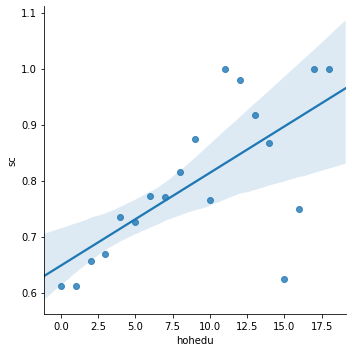

In [12]:
#(b)
data97=data[data['year']==97]
b=pd.DataFrame(data97.groupby('hohedu')[['hohedu','sc']].mean())
sns.lmplot(x='hohedu', y='sc',data=b,fit_reg=True)

we can discover that education level of the household head is high, then average enrollment rates in 1997 is more likely to be higher.

In [13]:
#(c)
data98p=data[(data['year']==98)&(data['poor']==1)]
results = smf.ols('sc ~ progresa ', data=data98p).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     48.59
Date:                Wed, 27 Nov 2019   Prob (F-statistic):           3.36e-12
Time:                        21:41:23   Log-Likelihood:                -6390.8
No. Observations:               10020   AIC:                         1.279e+04
Df Residuals:                   10018   BIC:                         1.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.6574      0.007     88.407

##### the effects of Progresa increase the likelihood of the 1998 enrollment rates of the poor by 6.57% We reject that the treatment effects are zero because t-value is 6.97 and p-value is 0
##### the counterfactual assumption underlying these regressions is that missing data is random. In the reality, those missing data maybe is the people who don't go to school. Therefore, when we run the regression, we can get the significant effect. Maybe in the reality, even though giving these people grant, it can not increase the likeihood of going to school for those people.

In [14]:
#(d)
results1 = smf.ols('sc ~ progresa + sex+ indig+dist_sec+ fam_n+ min_dist+ dist_cap+ hohedu+ hohwag+ welfare_index+ hohsex+hohage+ age ', data=data98p).fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     338.7
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        21:41:23   Log-Likelihood:                -4544.4
No. Observations:                9967   AIC:                             9117.
Df Residuals:                    9953   BIC:                             9218.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.2516      0.046     48.730

##### the controls make the point estimate of treatment effect increase a little bit
##### the controls also make the standard error on the treatment effect decrease a little bit

In [15]:
#(e)
results2 = smf.ols('sc ~ progresa + sex+ indig+dist_sec+ min_dist+ dist_cap+ hohedu+ age ', data=data98p).fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     554.1
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        21:41:24   Log-Likelihood:                -4565.0
No. Observations:                9999   AIC:                             9148.
Df Residuals:                    9990   BIC:                             9213.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.2684      0.033     68.614

##### we would run the regression uesd in question(d) to test whether or not Progresa had a differential impact on girls. 
##### Besides, even if I take the variables which is not statistically significant out off the regression and then run again, I still find that Progresa had a differential impact on girls because the coefficient of sex is 0.0618 and t-statistics is 8.079 p-value is 0, which means that the girls'effect is fewer than the boys by 6.18% 